In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
pip install tensorflow opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install ultralytics



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 1.3/216.1 MB 7.4 MB/s eta 0:00:29
   ---------------------------------------- 1.8/216.1 MB 5.0 MB/s eta 0:00:43
    --------------------------------------- 2.9/216.1 MB 4.7 MB/s eta 0:00:46
    --------------------------------------- 4.5/216.1 MB 5.6 MB/s eta 0:00:38
   - -------------------------------------- 5.8/216.1 MB 5.7 MB/s eta 0:00:38
   - -------------------------------------- 7.1/216.1 MB 5.8 MB/s eta 0:00:36
   - -------------------------------------- 8.7/216.1 MB 6.1 MB/s eta 0:00:34
   - -------------------------------------- 10.0/216.1 MB 6.1 MB/s eta 0:00:34
   -- ------------------------------------- 11.5/216.1 MB 6.3 MB/s eta 0:00:33
  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
from ultralytics import YOLO

In [6]:
model = YOLO("yolov8n.pt")  # "n" = nano, fastest & lightest version


In [7]:
image_path = "dog1.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [8]:
results = model(image_rgb)  # Inference



0: 384x640 1 dog, 62.9ms
Speed: 4.8ms preprocess, 62.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
# Get the first result
boxes = results[0].boxes
output = image_rgb.copy()

for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf[0])
    cls = int(box.cls[0])
    label = model.names[cls]
    
    # Draw rectangle
    cv2.rectangle(output, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    # Put label
    text = f"{label} ({conf:.2f})"
    cv2.putText(output, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                0.9, (255, 0, 0), 2)


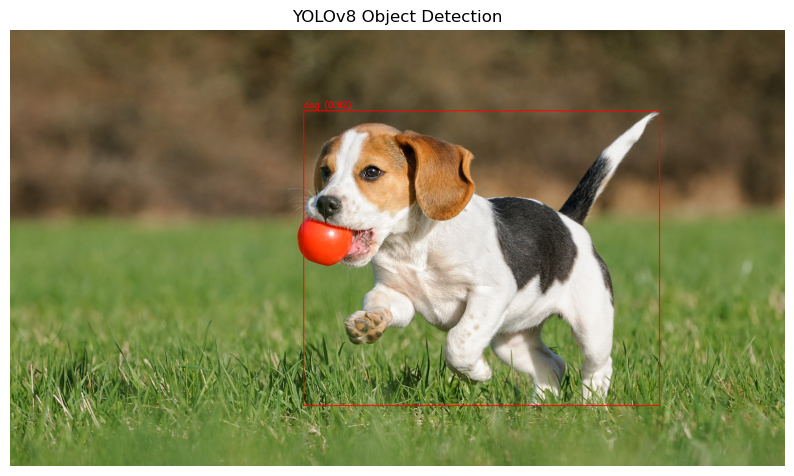

In [10]:
plt.figure(figsize=(10, 8))
plt.imshow(output)
plt.axis("off")
plt.title("YOLOv8 Object Detection")
plt.show()
